In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew
% matplotlib inline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import KFold
seed = 0

C:\Users\lionp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Overall description

In [27]:
# raw = pd.read_csv('all_train_to_kewei.csv')
raw = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
names = list(raw)
all_data = raw.append(test_data, ignore_index=True)[names]
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
missing_info = all_data.isnull().sum()
missing_info = missing_info[missing_info != 0]
missing_info

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [8]:
all_data.dtypes[all_data.dtypes != "object"].index
# all_data = missing(all_data)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
# num = all_data.loc[:,['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
#        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
#        'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal']]
num = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal']

In [10]:
skewed_feats = all_data[num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
BsmtFinSF2,4.145323
EnclosedPorch,4.003891
ScreenPorch,3.946694
MasVnrArea,2.601240
OpenPorchSF,2.535114


# after log

In [194]:
skewed_feats = all_data[num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

,Skew
PoolArea,15.119426
3SsnPorch,8.924822
LowQualFinSF,8.744143
MiscVal,5.597060
ScreenPorch,2.978396
BsmtFinSF2,2.564481
EnclosedPorch,2.025461
MasVnrArea,0.636361
2ndFlrSF,0.327362
1stFlrSF,0.223905


In [176]:
all_data.loc[:,num+['SalePrice']].corr().iloc[:,-1]

LotFrontage      0.334366
LotArea          0.257320
MasVnrArea       0.426776
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
SalePrice        1.000000
Name: SalePrice, dtype: float64

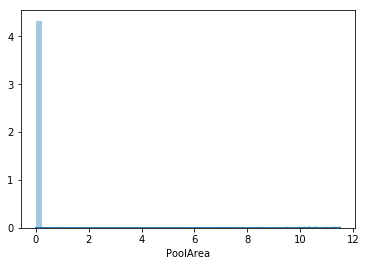

In [48]:
sns.distplot(all_data['PoolArea'])

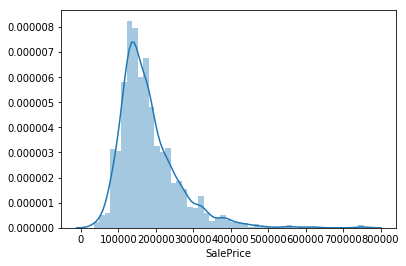

In [71]:
sns.distplot(raw['SalePrice'])

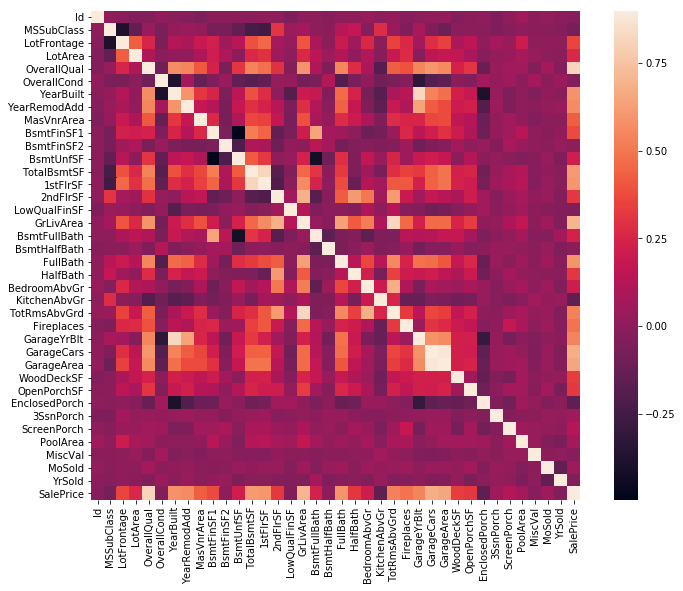

In [138]:
cor = raw.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cor, vmax=0.9, square=True)

# Preprocessing

In [14]:
# dummies = [1,2,5,6,7,8,10,11,12,13,14,15,16,21,22,23,24,25,29,35,39,41,42,52,55,56,58,74,76,77,78,79]
# # dummies = [1,2,5,6,7,8,10,11,12,13,14,15,16,21,22,23,24,25,29,35,39,41,42,52,55,56,58,74,76,77,78,79,9,27,28,30,31,32,33,40,53,57,60,63,64,65,72,73]

# # ordinal = [17,18,27,28,30,31,32,33,40,47,48,49,50,51,53,54,57,60,61,63,64,65,72,73]

# transform = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'Av':3, 'Mn':2, 'No':1, 'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3,
#             'LwQ':2, 'Unf':1, 'Fin':3, 'RFn':2, 'Unf':1, 'Y':3, 'P':2, 'N':1, 'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1,
#             'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}

# data_dummy = []
# feature_name=np.array(raw.keys())
# for i in dummies:
#     data_dummy.append(pd.get_dummies(raw.iloc[:,i], prefix=feature_name[i]))
# data_dummy.append(raw.drop(list(raw.iloc[:,dummies]),axis=1))
# data_dummy = pd.concat(data_dummy,axis=1)

# data_dummy.replace(transform, inplace=True)
# # data_dummy.replace('Ex', )




#function:
def preprocess(new):    
    dummies = [1,2,5,6,7,8,10,11,12,13,14,15,16,21,22,23,24,25,29,35,39,41,42,52,55,56,58,74,76,77,78,79]
    # dummies = [1,2,5,6,7,8,10,11,12,13,14,15,16,21,22,23,24,25,29,35,39,41,42,52,55,56,58,74,76,77,78,79,9,27,28,30,31,32,33,40,53,57,60,63,64,65,72,73]

    # ordinal = [17,18,27,28,30,31,32,33,40,47,48,49,50,51,53,54,57,60,61,63,64,65,72,73]

    transform = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'Av':3, 'Mn':2, 'No':1, 'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3,
                'LwQ':2, 'Unf':1, 'Fin':3, 'RFn':2, 'Unf':1, 'Y':3, 'P':2, 'N':1, 'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1,
                'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}

#     new = raw.copy()
#     new['Alley'] = new['Alley'].fillna('N')
#     new['LotFrontage'] = new['LotFrontage'].fillna(new['LotFrontage'].median())
#     new['MasVnrType'] = new['MasVnrType'].fillna('N')
#     new['MasVnrArea'] = new['MasVnrArea'].fillna(0)
#     new['BsmtQual'] = new['BsmtQual'].fillna(0)
#     new['BsmtCond'] = new['BsmtCond'].fillna(0)
#     new['BsmtExposure'] = new['BsmtExposure'].fillna(0)
#     new['BsmtFinType1'] = new['BsmtFinType1'].fillna(0)
#     new['BsmtFinType2'] = new['BsmtFinType2'].fillna(0)
#     new['Electrical'] = new['Electrical'].fillna('N')
#     new['FireplaceQu'] = new['FireplaceQu'].fillna(0)
#     new['GarageType'] = new['GarageType'].fillna('N')
#     new['GarageYrBlt'] = new['GarageYrBlt'].fillna(new['GarageYrBlt'].min())
#     new['GarageFinish'] = new['GarageFinish'].fillna(0)
#     new['GarageQual'] = new['GarageQual'].fillna(0)
#     new['GarageCond'] = new['GarageCond'].fillna(0)
#     new['PoolQC'] = new['PoolQC'].fillna(0)
#     new['Fence'] = new['Fence'].fillna(0)
#     new['MiscFeature'] = new['MiscFeature'].fillna('N')

    data_dummy = []
    feature_name=np.array(new.keys())
    for i in dummies:
        data_dummy.append(pd.get_dummies(new.iloc[:,i], prefix=feature_name[i]))
    data_dummy.append(new.drop(list(raw.iloc[:,dummies]),axis=1))
    data_dummy = pd.concat(data_dummy,axis=1)

    data_dummy.replace(transform, inplace=True)
    # data_dummy.replace('Ex', )

    # data_dummy['LotFrontage'] = data_dummy['LotFrontage'].fillna(data_dummy['LotFrontage'].median())

#     X_train_CV, X_test_f, Y_train_CV, Y_test_f = train_test_split(data_dummy.iloc[:,1:-1], data_dummy.iloc[:,-1],random_state=seed, test_size=0.2)
#     # X_train, X_test, Y_train, Y_test = train_test_split(X_train_CV, Y_train_CV,random_state=0)
#     # X_train_CV, X_test_f, Y_train_CV, Y_test_f = train_test_split(raw, l.iloc[:,-1],random_state=seed, test_size=0.2)

#     baseline = xgb.XGBRegressor(seed=seed)
#     print(np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5)))
    return data_dummy


def missing(new):
#     new = raw.copy()
    new['Alley'] = new['Alley'].fillna('N')
#     new['LotFrontage'] = new['LotFrontage'].fillna(new['LotFrontage'].median())
    new["LotFrontage"] = new.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
    new['MasVnrType'] = new['MasVnrType'].fillna('N')
    new['MasVnrArea'] = new['MasVnrArea'].fillna(0)
    new['BsmtQual'] = new['BsmtQual'].fillna(0)
    new['BsmtCond'] = new['BsmtCond'].fillna(0)
    new['BsmtExposure'] = new['BsmtExposure'].fillna(0)
    new['BsmtFinType1'] = new['BsmtFinType1'].fillna(0)
    new['BsmtFinType2'] = new['BsmtFinType2'].fillna(0)
    new['Electrical'] = new['Electrical'].fillna('N')
    new['FireplaceQu'] = new['FireplaceQu'].fillna(0)
    new['GarageType'] = new['GarageType'].fillna('N')
    new['GarageYrBlt'] = new['GarageYrBlt'].fillna(new['GarageYrBlt'].min())
    new['GarageFinish'] = new['GarageFinish'].fillna(0)
    new['GarageQual'] = new['GarageQual'].fillna(0)
    new['GarageCond'] = new['GarageCond'].fillna(0)
    new['PoolQC'] = new['PoolQC'].fillna(0)
    new['Fence'] = new['Fence'].fillna(0)
    new['MiscFeature'] = new['MiscFeature'].fillna('N')
    
    new['MSZoning'] = new['MSZoning'].fillna('N')
    new['Utilities'] = new['Utilities'].fillna('N')
    new['Exterior1st'] = new['Exterior1st'].fillna('N')
    new['Exterior2nd'] = new['Exterior2nd'].fillna('N')
    new['BsmtFinSF1'] = new['BsmtFinSF1'].fillna(0)
    new['BsmtFinSF2'] = new['BsmtFinSF2'].fillna(0)
    new['BsmtUnfSF'] = new['BsmtUnfSF'].fillna(new['BsmtUnfSF'].max())
    new['TotalBsmtSF'] = new['TotalBsmtSF'].fillna(0)
    new['BsmtFullBath'] = new['BsmtFullBath'].fillna(0)
    new['BsmtHalfBath'] = new['BsmtHalfBath'].fillna(0)
    new['KitchenQual'] = new['KitchenQual'].fillna(0)
    new['Functional'] = new['Functional'].fillna('N')
    new['GarageCars'] = new['GarageCars'].fillna(0)
    new['GarageArea'] = new['GarageArea'].fillna(0)
    new['SaleType'] = new['SaleType'].fillna('Oth')

    return new


In [28]:
raw['SalePrice'] = np.log1p(raw['SalePrice'])
training_Y = raw['SalePrice']

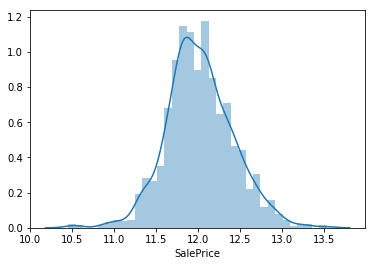

In [12]:
sns.distplot(raw['SalePrice'])

In [29]:
# raw, test_data = missing(raw.iloc[:,1:]), missing(test_data.iloc[:,1:])
# raw, test_data = missing(raw), missing(test_data)
names = list(raw)
all_data = raw.append(test_data, ignore_index=True)[names]
all_data = missing(all_data)
all_data = all_data.drop(['SalePrice'],axis=1)

all_data = preprocess(all_data)
all_data = all_data.drop(['Id'],axis=1)
all_data = all_data.drop(['Utilities'],axis=1)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# all_data['SalePrice'] = raw['SalePrice']

In [187]:
#not to use this(RMSE increase)
#log transformation for skewed features
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [30]:
training_X = all_data.iloc[:1460,:]
# training_Y = all_data.iloc[:1460,-1]
testing_X = all_data.iloc[1460:,:]
# training_X.to_csv('training.csv', index=False)
# testing_X.to_csv('testing.csv',index=False)

In [17]:
training_X.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,TotalSF
0,0,0,0,0,0,1,0,0,0,0,...,0,61,0,0,0,0,0,0,0,2566.0
1,1,0,0,0,0,0,0,0,0,0,...,298,0,0,0,0,0,0,0,0,2524.0
2,0,0,0,0,0,1,0,0,0,0,...,0,42,0,0,0,0,0,0,0,2706.0
3,0,0,0,0,0,0,1,0,0,0,...,0,35,272,0,0,0,0,0,0,2473.0
4,0,0,0,0,0,1,0,0,0,0,...,192,84,0,0,0,0,0,0,0,3343.0


# Split data

In [31]:
X_train_CV, X_test_f, Y_train_CV, Y_test_f = train_test_split(training_X, training_Y,random_state=seed, test_size=0.2)
# X_train, X_test, Y_train, Y_test = train_test_split(X_train_CV, Y_train_CV,random_state=0)
# X_train_CV, X_test_f, Y_train_CV, Y_test_f = train_test_split(raw, l.iloc[:,-1],random_state=seed, test_size=0.2)

In [19]:
training_Y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

# Baseline Model

In [32]:
# baseline = xgb.XGBRegressor(seed=seed)
from sklearn.metrics import mean_squared_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(training_X,training_Y)
pred = baseline.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.122999474193


0.11112878200126855

In [21]:
def getresult(prediction_result,filename):
    result=pd.DataFrame(index=test_data['Id'])
    result['SalePrice']=prediction_result
    result.to_csv(filename)

# First Test

In [12]:
import time
model = Lasso(alpha=0.0005)
model.fit(training_X, training_Y)
pred = model.predict(testing_X)
getresult(pred,'1.csv')


NameError: name 'getresult' is not defined

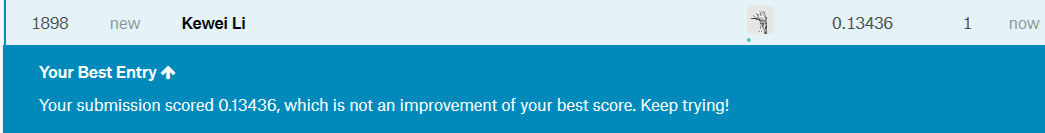

# Scaling
do not work, might because outliers

In [22]:

scaler = MinMaxScaler().fit(training_X)
training_X = scaler.transform(training_X)
testing_X = scaler.transform(testing_X)


X_train_CV, X_test_f, Y_train_CV, Y_test_f = train_test_split(training_X, training_Y,random_state=seed, test_size=0.2)

In [23]:
training_X = pd.DataFrame(training_X)
testing_X = pd.DataFrame(testing_X)
training_X['price'] = pd.DataFrame(training_Y).reset_index(drop=True)
training_X.to_csv('training_o_s_logf.csv', index=False)
testing_X.to_csv('testing_o_s_logf.csv',index=False)

In [24]:
# baseline = xgb.XGBRegressor(seed=seed)
from sklearn.metrics import mean_squared_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred = baseline.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.122451248477


0.17213692624434027

In [16]:
import time
model = Lasso(alpha=0.0005)
model.fit(training_X, training_Y)
pred = model.predict(testing_X)
getresult(pred,'2.csv')


# Outliers

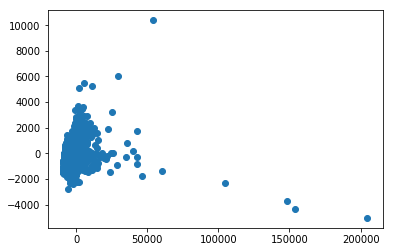

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
% matplotlib inline
pca=PCA(n_components=2).fit(training_X)
v_data = pca.transform(training_X)

x = []
y = []

count = 0
out = []
for i in v_data:
    if i[0] > 20000 or i[1] > 3000:
        out.append(count)
        
    count += 1
    x.append(i[0])
    y.append(i[1])

plt.scatter(x,y)
len(out)
training_X = training_X.drop(out,axis=0)
training_Y = training_Y.drop(out,axis=0)


Scaler

In [34]:
scaler = MinMaxScaler().fit(training_X)
training_X = scaler.transform(training_X)
testing_X = scaler.transform(testing_X)
X_train_CV, X_test_f, Y_train_CV, Y_test_f = train_test_split(training_X, training_Y,random_state=seed, test_size=0.2)

In [35]:
# baseline = xgb.XGBRegressor(seed=seed)
from sklearn.metrics import mean_squared_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred = baseline.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.114382985694


0.10986882040960973

# Second test

In [237]:
model = xgb.XGBRegressor(seed=seed)
model.fit(training_X, training_Y)
pred = model.predict(testing_X)
getresult(pred,'2.csv')

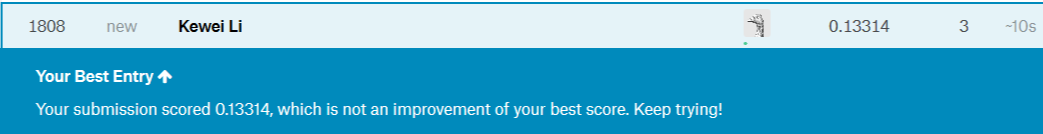

# Third test
target log

In [27]:
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred = baseline.predict(X_test_f)
print(mean_squared_error(pred, Y_test_f)**0.5)
baseline.fit(training_X,training_Y)
pred = baseline.predict(testing_X)
getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred],'3.csv')

0.114382985694
0.10986882041


# Model Selection

In [28]:
xgbm = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread = -1,seed=seed)
s = -np.mean(cross_val_score(xgbm, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
xgbm.fit(X_train_CV,Y_train_CV)
pred = xgbm.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.116654783284


0.1195940943161669

In [391]:
lasso = baseline = Lasso(alpha=0.0005,random_state=0)
s = -np.mean(cross_val_score(lasso, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
lasso.fit(training_X, training_Y)
len([i for i in lasso.coef_ if i != 0])

0.114382985694


113

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
mlp = MLPRegressor(
    random_state=0,
    hidden_layer_sizes = (110, 90),
#     max_iter=3000,
#     early_stopping=True,
#     alpha = 0.01
)
s = -np.mean(cross_val_score(mlp, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
mlp.fit(X_train_CV,Y_train_CV)
pred = mlp.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.189327556071


0.16051140640395894

In [31]:
rf = RandomForestRegressor(
    max_features = 27,
    min_samples_leaf = 1,
    n_estimators = 41,
    random_state = 0,
    min_samples_split = 6
)
s = -np.mean(cross_val_score(rf, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
rf.fit(X_train_CV,Y_train_CV)
pred = rf.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.136356323887


0.14264394196212749

In [400]:
ada = AdaBoostRegressor(
#     n_estimators = 61,
#     learning_rate = 1.005,
#     loss = 'exponential',
    random_state = 0
)
print(s**0.5)
ada.fit(X_train_CV,Y_train_CV)
pred = ada.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.198069905911


0.1697683342308354

In [399]:
knn = KNeighborsRegressor(n_neighbors = 11)
s = -np.mean(cross_val_score(knn, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
knn.fit(X_train_CV,Y_train_CV)
pred = knn.predict(X_test_f)
mean_squared_error(pred, Y_test_f)**0.5

0.198069905911


0.21449902245969696

# Tuning

In [322]:
from sklearn.grid_search import GridSearchCV
Search_param = {
    'hidden_layer_sizes' :[(10, 10, 10),
 (10, 10, 30),
 (10, 10, 50),
 (10, 10, 70),
 (10, 10, 90),
 (10, 30, 10),
 (10, 30, 30),
 (10, 30, 50),
 (10, 30, 70),
 (10, 30, 90),
 (10, 50, 10),
 (10, 50, 30),
 (10, 50, 50),
 (10, 50, 70),
 (10, 50, 90),
 (10, 70, 10),
 (10, 70, 30),
 (10, 70, 50),
 (10, 70, 70),
 (10, 70, 90),
 (10, 90, 10),
 (10, 90, 30),
 (10, 90, 50),
 (10, 90, 70),
 (10, 90, 90),
 (30, 10, 10),
 (30, 10, 30),
 (30, 10, 50),
 (30, 10, 70),
 (30, 10, 90),
 (30, 30, 10),
 (30, 30, 30),
 (30, 30, 50),
 (30, 30, 70),
 (30, 30, 90),
 (30, 50, 10),
 (30, 50, 30),
 (30, 50, 50),
 (30, 50, 70),
 (30, 50, 90),
 (30, 70, 10),
 (30, 70, 30),
 (30, 70, 50),
 (30, 70, 70),
 (30, 70, 90),
 (30, 90, 10),
 (30, 90, 30),
 (30, 90, 50),
 (30, 90, 70),
 (30, 90, 90),
 (50, 10, 10),
 (50, 10, 30),
 (50, 10, 50),
 (50, 10, 70),
 (50, 10, 90),
 (50, 30, 10),
 (50, 30, 30),
 (50, 30, 50),
 (50, 30, 70),
 (50, 30, 90),
 (50, 50, 10),
 (50, 50, 30),
 (50, 50, 50),
 (50, 50, 70),
 (50, 50, 90),
 (50, 70, 10),
 (50, 70, 30),
 (50, 70, 50),
 (50, 70, 70),
 (50, 70, 90),
 (50, 90, 10),
 (50, 90, 30),
 (50, 90, 50),
 (50, 90, 70),
 (50, 90, 90),
 (70, 10, 10),
 (70, 10, 30),
 (70, 10, 50),
 (70, 10, 70),
 (70, 10, 90),
 (70, 30, 10),
 (70, 30, 30),
 (70, 30, 50),
 (70, 30, 70),
 (70, 30, 90),
 (70, 50, 10),
 (70, 50, 30),
 (70, 50, 50),
 (70, 50, 70),
 (70, 50, 90),
 (70, 70, 10),
 (70, 70, 30),
 (70, 70, 50),
 (70, 70, 70),
 (70, 70, 90),
 (70, 90, 10),
 (70, 90, 30),
 (70, 90, 50),
 (70, 90, 70),
 (70, 90, 90),
 (90, 10, 10),
 (90, 10, 30),
 (90, 10, 50),
 (90, 10, 70),
 (90, 10, 90),
 (90, 30, 10),
 (90, 30, 30),
 (90, 30, 50),
 (90, 30, 70),
 (90, 30, 90),
 (90, 50, 10),
 (90, 50, 30),
 (90, 50, 50),
 (90, 50, 70),
 (90, 50, 90),
 (90, 70, 10),
 (90, 70, 30),
 (90, 70, 50),
 (90, 70, 70),
 (90, 70, 90),
 (90, 90, 10),
 (90, 90, 30),
 (90, 90, 50),
 (90, 90, 70),
 (90, 90, 90)]
                
              
                
                
               }
Gsearch = GridSearchCV(estimator = MLPRegressor(random_state=seed),
                       param_grid =Search_param, 
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                      verbose = 1)
# bst.fit(X_train,y_train)
# Gsearch.fit(X,label)
Gsearch.fit(X_train_CV,Y_train_CV)
Gsearch.best_params_,(-Gsearch.best_score_)**0.5

# print(metrics.r2_score(y_test.values,preds))

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed: 10.7min finished


({'hidden_layer_sizes': (70, 70, 50)}, 0.16973023160020573)

# Forth test
lasso with Tune

In [492]:
from sklearn.metrics import mean_squared_log_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred = baseline.predict(X_test_f)
print(mean_squared_error(pred, Y_test_f)**0.5)
lasso.fit(training_X,training_Y)
pred = lasso.predict(testing_X)
getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred],'4.csv')

0.116778290216
0.110999828655


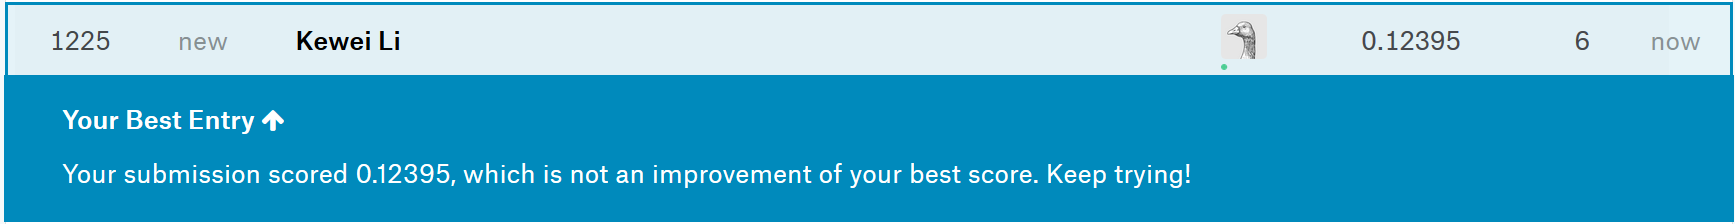


# 5

In [494]:
from sklearn.metrics import mean_squared_log_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred = baseline.predict(X_test_f)
print(mean_squared_error(pred, Y_test_f)**0.5)
lasso.fit(training_X,training_Y)
pred = lasso.predict(testing_X)
getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred],'5.csv')

0.116778290216
0.110999828655


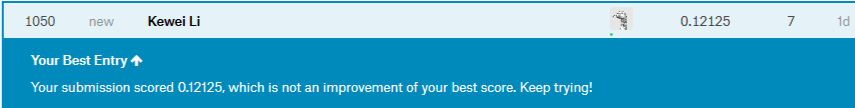

# 6
after process skewed feature

In [141]:
from sklearn.metrics import mean_squared_log_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred = baseline.predict(X_test_f)
print(mean_squared_error(pred, Y_test_f)**0.5)
lasso.fit(training_X,training_Y)
pred = lasso.predict(testing_X)
getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred],'6.csv')
#1223

0.117034165889
0.154092899059


# 7
scaler

In [156]:
from sklearn.metrics import mean_squared_log_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred = baseline.predict(X_test_f)
print(mean_squared_error(pred, Y_test_f)**0.5)
lasso.fit(training_X,training_Y)
pred = lasso.predict(testing_X)
getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred],'7.csv')


0.115707899489
0.109487054005


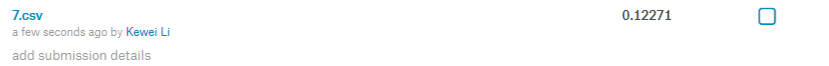

# 8
interactive term

In [394]:
from sklearn.metrics import mean_squared_log_error
baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(baseline, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
baseline.fit(X_train_CV,Y_train_CV)
pred1 = baseline.predict(X_test_f)
print(mean_squared_error(pred1, Y_test_f)**0.5)
baseline.fit(training_X,training_Y)
pred1 = baseline.predict(testing_X)
getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred1],'8.csv')


0.114382985694
0.10986882041


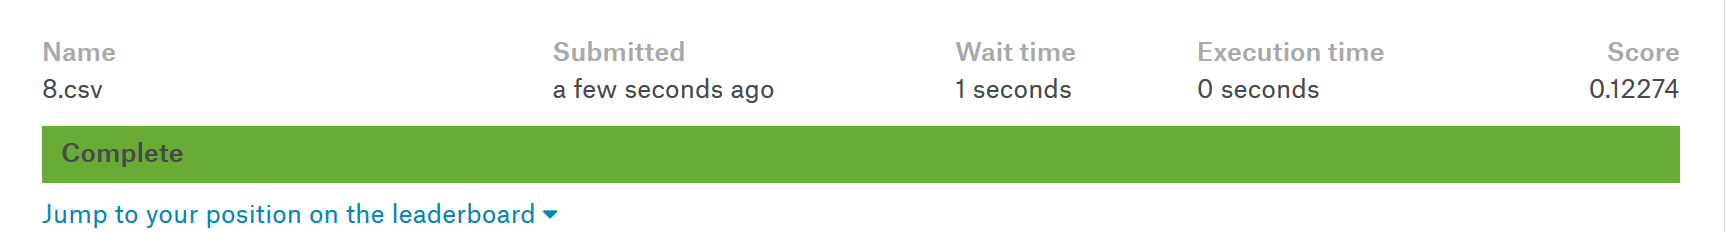

In [346]:
from sklearn.metrics import mean_squared_log_error
# baseline = Lasso(alpha=0.0005)
s = -np.mean(cross_val_score(xgbm, X_train_CV, Y_train_CV, cv=5,scoring='neg_mean_squared_error'))
print(s**0.5)
xgbm.fit(X_train_CV,Y_train_CV)
pred = xgbm.predict(X_test_f)
print(mean_squared_error(pred, Y_test_f)**0.5)
# xgbm.fit(training_X,training_Y)
# pred = xgbm.predict(testing_X)
# getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred],'8.csv')


0.116654783284
0.119594094316


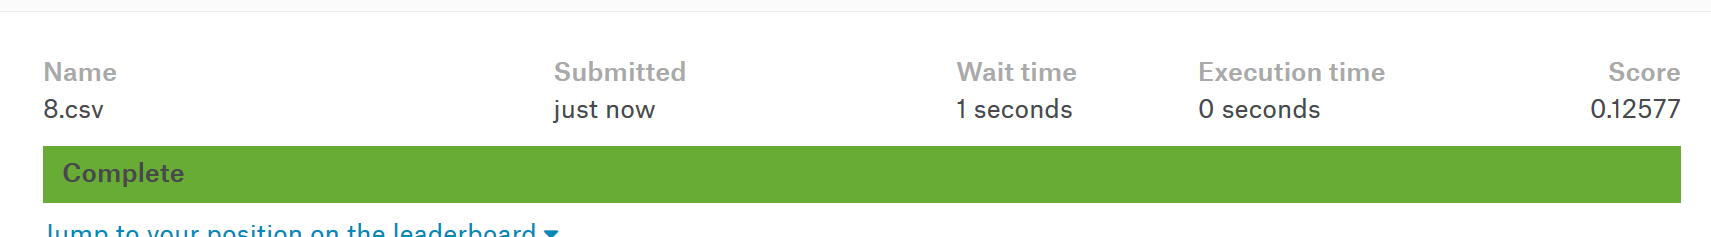

# Stacking

In [32]:
class Stacking(object):
    def __init__(self, k_folds, base_models, seed):
        self.k_folds = k_folds
        self.base_models = base_models
        self.seed = seed
    def step1(self, train, test, label):
        folds = KFold(train.shape[0],self.k_folds,True,self.seed)
#         P = pd.DataFrame()
#         T = pd.DataFrame()
        for i, m in enumerate(self.base_models):
            
            model = m
            P_sub = pd.DataFrame()
            T_sub = pd.DataFrame()
            L_sub = pd.DataFrame()
#             print(i)

            for j,(train_index, test_index) in enumerate(folds):
                
                train_sub = train.loc[train_index]
                test_sub = train.loc[test_index]
                label_sub = label.loc[train_index]
#                 print(train,train_index,train_sub)
#                 print(label_sub)

                model.fit(train_sub, label_sub)
                P_sub = P_sub.append(pd.DataFrame(model.predict(test_sub))).reset_index(drop=True)
                T_sub.insert(j,str(j),model.predict(test))
                L_sub = L_sub.append(pd.DataFrame(label.loc[test_index].values)).reset_index(drop=True)
        
            
                
            if(i == 0):
                P = [P_sub]
                T = [T_sub.apply(lambda x: x.sum(), axis=1)/self.k_folds]
                continue
            P.append(P_sub)        
            T.append(T_sub.apply(lambda x: x.sum(), axis=1)/self.k_folds)
        
        P = pd.concat(P,axis=1)
        T = pd.concat(T,axis=1)
        P.columns = list(range(i+1))
        return P,T,L_sub

    
    def step2(self, stacker, P, T, L):
        stacker.fit(P,L)
        return stacker.predict(T)
                
            

In [33]:
X_train_CV = pd.DataFrame(X_train_CV).reset_index(drop=True)
X_test_f = pd.DataFrame(X_test_f).reset_index(drop=True)
Y_train_CV = pd.DataFrame(Y_train_CV).reset_index(drop=True)

In [34]:
#stacking
e = [baseline, xgbm,rf]
NB = Stacking(5,e,0)#abc
P,T,L = NB.step1(X_train_CV,X_test_f,Y_train_CV)
pred = NB.step2(xgb.XGBRegressor(seed=seed),P,T,L)
mean_squared_error(pred, Y_test_f)**0.5

0.11777659684647061

In [352]:
training_X = pd.DataFrame(training_X).reset_index(drop=True)
testing_X = pd.DataFrame(testing_X).reset_index(drop=True)
training_Y = pd.DataFrame(training_Y).reset_index(drop=True)

In [354]:
e = [baseline, xgbm]
NB = Stacking(5,e,0)#abc
P,T,L = NB.step1(training_X,testing_X,training_Y)
pred = NB.step2(xgb.XGBRegressor(seed=seed),P,T,L)
# mean_squared_error(pred, Y_test_f)**0.5
pred

array([ 11.68823147,  12.0278368 ,  12.07683277, ...,  12.0278368 ,
        11.68823147,  12.3196907 ], dtype=float32)

In [355]:
getresult(['{:.2f}'.format(math.exp(i)+1) for i in pred],'10.csv')

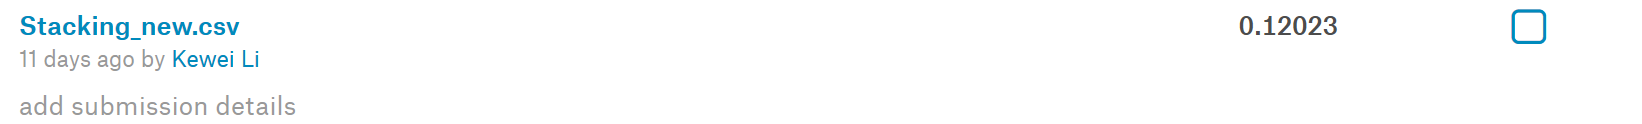

# 9
avg ensambel

In [347]:
avg = [(i+j)/2 for i, j in zip(pred1, pred)]
# getresult(['{:.2f}'.format(math.exp(i)+1) for i in avg],'9.csv')
print(mean_squared_error(avg, Y_test_f)**0.5)

0.111573007675


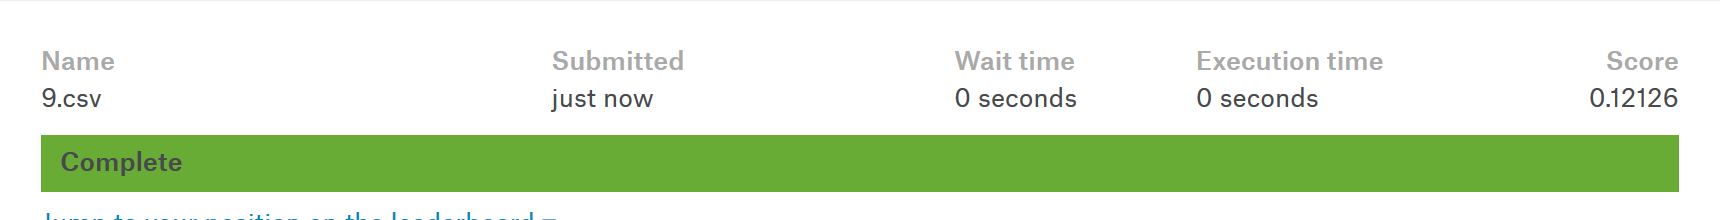